In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [2]:
data["Country/Region"].value_counts()

China             34
Canada            16
United Kingdom    14
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 198, dtype: int64

In [3]:
last_date = "12/25/21"

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178689,178745,178769,178809,178850,178873,178879,178899,178901,178901
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274828,274828,274862,274929,275002,275055,275107,275167,275177,275191
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265767,265771,265772,265773,265776,265779,265780,265782,265782,265782
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41013,41013,41013,41013,41349,41349,41349,41349,41349,41349
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [5]:
confirmed_cases = data.groupby("Country/Region").sum()

In [6]:
confirmed_cases.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Libya,26.335100,17.228331,0,0,0,0,0,0,0,0,...,501862,501862,501904,501904,501904,501904,501904,501904,501916,501916
Saint Lucia,13.909400,-60.978900,0,0,0,0,0,0,0,0,...,23239,23285,23285,23285,23361,23394,23394,23394,23459,23482
Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,0,...,5953,5957,5957,5957,5957,5957,5957,5957,5964,5964
Bulgaria,42.733900,25.485800,0,0,0,0,0,0,0,0,...,1153129,1153506,1154646,1155387,1155975,1156466,1156729,1156971,1157199,1157919
Solomon Islands,-9.645700,160.156200,0,0,0,0,0,0,0,0,...,12437,14182,14786,14786,14786,14786,14786,15677,15677,15677
Togo,8.619500,0.824800,0,0,0,0,0,0,0,0,...,36977,36979,36981,36981,36985,36985,36985,36989,36991,36993
Kyrgyzstan,41.204380,74.766098,0,0,0,0,0,0,0,0,...,200983,200990,200991,200991,200992,200992,200992,200993,200993,200993
Bahamas,25.025885,-78.035889,0,0,0,0,0,0,0,0,...,33483,33488,33498,33511,33527,33541,33558,33578,33582,33601
Israel,31.046051,34.851612,0,0,0,0,0,0,0,0,...,4057765,4062271,4066014,4067680,4071484,4074112,4076104,4077856,4080480,4082954


In [7]:
new_cases_china = confirmed_cases.loc["China"][2:].diff().dropna()

<AxesSubplot:>

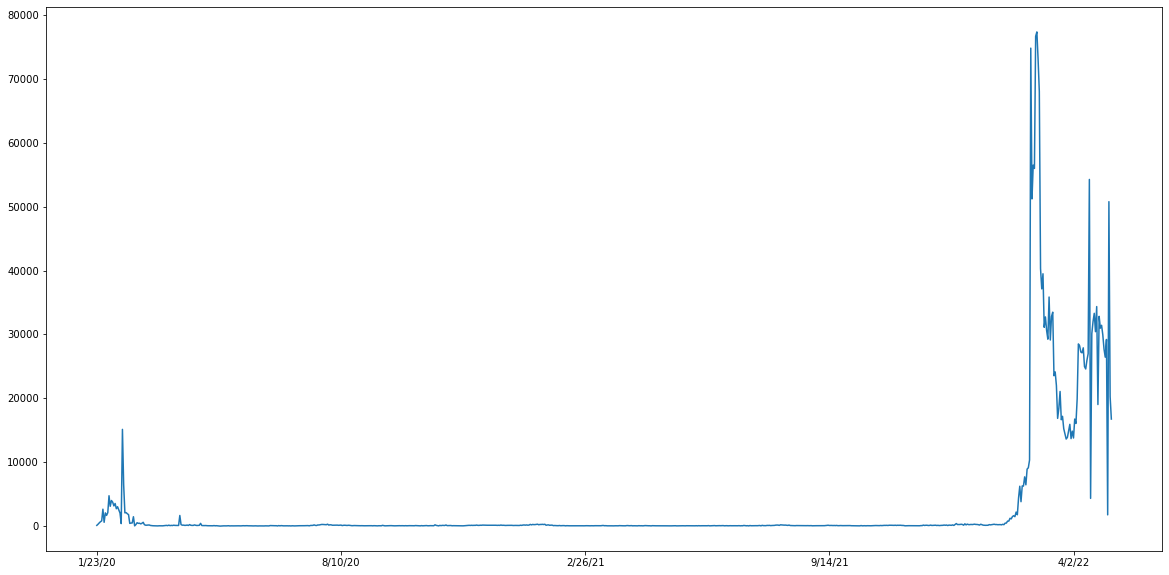

In [8]:
plt.figure(figsize =(20,10))
new_cases_china.plot()

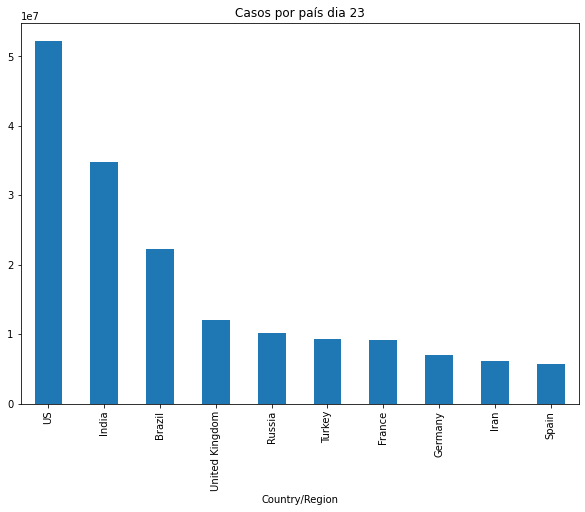

In [9]:
plt.rcParams["figure.figsize"] = (10,7)
confirmed_cases[last_date].sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Casos por país dia 23")
plt.show()

In [10]:
dead = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [11]:
def latest_by_country(data):
    return data.groupby("Country/Region").sum().iloc[:,-1]
information = [latest_by_country(confirmed_cases), latest_by_country(dead), latest_by_country(recovered)]
combined = pd.concat(information, axis = 1)
combined.columns = ['confirmed', 'dead', 'recovered']
combined.head()

,confirmed,dead,recovered
Country/Region,,,
Afghanistan,178901,7683,0
Albania,275191,3496,0
Algeria,265782,6875,0
Andorra,41349,153,0
Angola,99287,1900,0


In [12]:
sum_up = combined.sum()
letality_rate_1 = sum_up["dead"] / sum_up["confirmed"]
print(letality_rate_1 * 100) 
letality_rate_2 = 5.2

1.2120225135472542


In [13]:

letality_rate_1 = combined["dead"] / combined['confirmed'] * 100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2

combined.head()

,confirmed,dead,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,178901,7683,0,4.294554,5.2
Albania,275191,3496,0,1.270390,5.2
Algeria,265782,6875,0,2.586706,5.2
Andorra,41349,153,0,0.370021,5.2
Angola,99287,1900,0,1.913644,5.2


In [14]:
combined.sort_values("letality_rate_1", ascending = False)

,confirmed,dead,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,5.2
Yemen,11819,2149,0,18.182587,5.2
Sudan,62117,4931,0,7.938246,5.2
Peru,3567171,212877,0,5.967670,5.2
Mexico,5739680,324334,0,5.650733,5.2
...,...,...,...,...,...
Micronesia,7,0,0,0.000000,5.2
Summer Olympics 2020,865,0,0,0.000000,5.2
Antarctica,11,0,0,0.000000,5.2


<AxesSubplot:xlabel='Country/Region'>

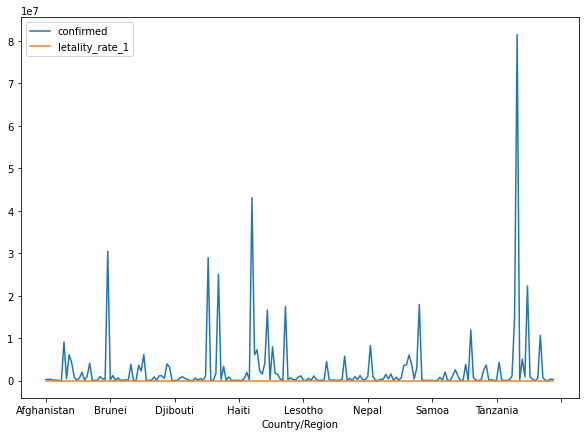

In [15]:
combined[['confirmed', 'letality_rate_1']].plot()

<AxesSubplot:xlabel='confirmed', ylabel='letality_rate_1'>

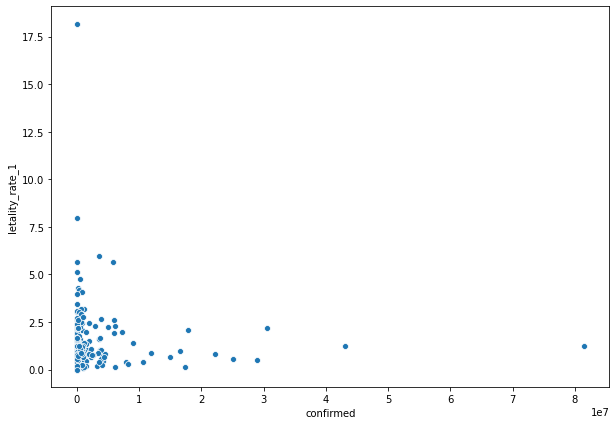

In [16]:
sns.scatterplot(data= combined.query('confirmed > 40'), x ='confirmed', y='letality_rate_1')

<AxesSubplot:xlabel='letality_rate_1'>

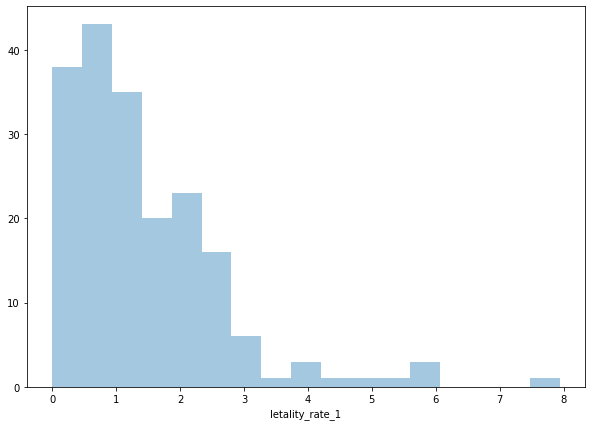

In [17]:
sns.distplot(combined.query('confirmed > 40 and letality_rate_1 < 10')['letality_rate_1'], kde= False)

In [18]:
def latest_by_country_at(data, date):
    return data.groupby("Country/Region").sum()[date]

information = [latest_by_country_at(confirmed_cases, '12/20/21'), latest_by_country_at(dead, '12/20/21'), latest_by_country_at(recovered, '12/20/21')]
combined_2_20_20 = pd.concat(information, axis = 1)
combined_2_20_20.columns = ['confirmed', 'dead', 'recovered']
combined_2_20_20.head()
sum_up = combined_2_20_20.loc['China']
letality_rate_1 = sum_up["dead"] / sum_up["confirmed"]
print(letality_rate_1 * 100) 

3.857750904968376


In [19]:

information = [latest_by_country_at(confirmed_cases, '12/8/21'), latest_by_country_at(dead, '12/20/21'), latest_by_country_at(recovered, '12/20/21')]
combined12 = pd.concat(information, axis = 1)
combined12.columns = ['confirmed', 'dead', 'recovered']
combined12.head()
sum_up = combined12.loc['China']
letality_rate_3 = sum_up["dead"] / sum_up["confirmed"]
print(letality_rate_3 * 100) 

3.8964378410086224
